In [1]:
import FinanceDataReader as web

from datetime import date, timedelta

import matplotlib.pyplot as plt

import datetime

import numpy as np


In [2]:
# %matplotlib inline

plt.figure(figsize=(15,9))

today = date.today()

startday = date(2021,5,1)

endday = date(2021,5,14)

SEC = web.DataReader("207940", startday, endday)

SEC

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-05-03,794590,794590,758023,763953,108378,-0.038557
2021-05-04,758023,762964,736280,755059,98553,-0.011642
2021-05-06,751105,779765,743198,773836,94042,0.024868
2021-05-07,775812,818309,775812,794590,195168,0.026820
2021-05-10,796566,814356,794590,806450,88393,0.014926
2021-05-11,805461,808426,791625,807438,91766,0.001225
2021-05-12,828192,853888,817321,845982,794798,0.047736
2021-05-13,834122,894408,833133,855865,610733,0.011682
2021-05-14,890455,936905,855864,936905,1022555,0.094688


<Figure size 1080x648 with 0 Axes>

In [3]:
SEC = SEC[SEC['Volume'] != 0]

SEC['Close'].head()

Date
2021-05-03    763953
2021-05-04    755059
2021-05-06    773836
2021-05-07    794590
2021-05-10    806450
Name: Close, dtype: int64

In [4]:
# 1 씩 shift

SEC['Close'].shift(1).head()


Date
2021-05-03         NaN
2021-05-04    763953.0
2021-05-06    755059.0
2021-05-07    773836.0
2021-05-10    794590.0
Name: Close, dtype: float64

In [5]:
# 수익률 계산 (log 수익률) / ln 미래가격/이전가격 

SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))

SEC

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2021-05-03,794590,794590,758023,763953,108378,-0.038557,NaN
2021-05-04,758023,762964,736280,755059,98553,-0.011642,-0.011710
2021-05-06,751105,779765,743198,773836,94042,0.024868,0.024564
2021-05-07,775812,818309,775812,794590,195168,0.026820,0.026466
2021-05-10,796566,814356,794590,806450,88393,0.014926,0.014816
2021-05-11,805461,808426,791625,807438,91766,0.001225,0.001224
2021-05-12,828192,853888,817321,845982,794798,0.047736,0.046632
2021-05-13,834122,894408,833133,855865,610733,0.011682,0.011615
2021-05-14,890455,936905,855864,936905,1022555,0.094688,0.090469


In [6]:
# 수익률 계산 (일반 수익률) /  (미래가격 – 이전가격) / 이전가격

SEC['Rate'] = ( SEC['Close'].astype(float) - SEC['Close'].shift(1).astype(float)) / (SEC['Close'].shift(1).astype(float))
SEC

,Open,High,Low,Close,Volume,Change,Rate
Date,,,,,,,
2021-05-03,794590,794590,758023,763953,108378,-0.038557,NaN
2021-05-04,758023,762964,736280,755059,98553,-0.011642,-0.011642
2021-05-06,751105,779765,743198,773836,94042,0.024868,0.024868
2021-05-07,775812,818309,775812,794590,195168,0.026820,0.026820
2021-05-10,796566,814356,794590,806450,88393,0.014926,0.014926
2021-05-11,805461,808426,791625,807438,91766,0.001225,0.001225
2021-05-12,828192,853888,817321,845982,794798,0.047736,0.047736
2021-05-13,834122,894408,833133,855865,610733,0.011682,0.011682
2021-05-14,890455,936905,855864,936905,1022555,0.094688,0.094688


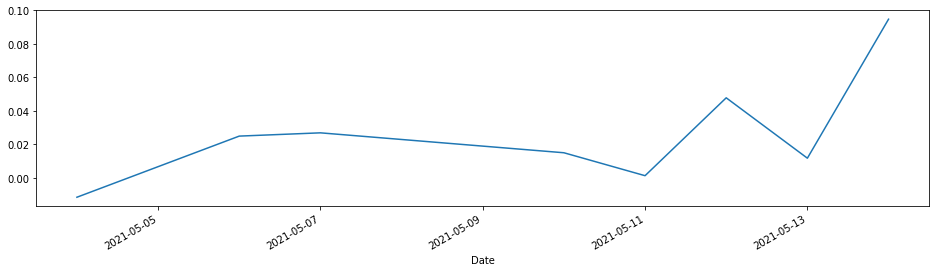

In [7]:
SEC["Rate"].plot(figsize=(16,4))

plt.show()

In [8]:
# ! pwd

In [9]:
# !pip install finance-datareader